In [113]:
using Plots
using StatsPlots
using CSV
using DataFrames

In [151]:
states = ["MA", "CT", "ME"]
ement_types = ["Traditional_Cement_Plant", "EChem_Cement_Plant"]
elec_types = ["Battery", "ThermalPower{NaturalGas}", "Solar", "Wind"]

4-element Vector{String}:
 "Battery"
 "ThermalPower{NaturalGas}"
 "Solar"
 "Wind"

In [117]:
pct_reduction = 20
df = CSV.read("results/" * string(pct_reduction) * "pct_co2_reduction_capacity.csv", DataFrame)

Row,commodity,commodity_subtype,zone,resource_id,component_id,type,variable,value
,String15,String15,String15,String15,String31,String,String15,Float64
1,Cement,capacity,cement_produced,cement_MA,cement_MA_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,23.4417
2,Cement,capacity,cement_produced,cement_CT,cement_CT_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,24.8551
3,Cement,capacity,cement_produced,cement_ME,cement_ME_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,219.932
4,Cement,capacity,cement_produced,cement_MA,cement_MA_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,0.0
5,Cement,capacity,cement_produced,cement_CT,cement_CT_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,0.0
6,Cement,capacity,cement_produced,cement_ME,cement_ME_cement_edge,MacroEnergy.ElectrochemCementPlant{CementMaterials},capacity,0.0
7,Electricity,capacity,elec_MA_elec_CT,MA_to_CT,MA_to_CT_elec_edge,PowerLine,capacity,2950.69
8,Electricity,capacity,elec_MA_elec_ME,MA_to_ME,MA_to_ME_elec_edge,PowerLine,capacity,2000.13
9,Electricity,capacity,elec_MA,storage_MA,storage_MA_discharge_edge,Battery,capacity,6410.98


In [153]:
function get_processed_df(df, types)
    # Add region column
    df.region = [resource_id[end-1:end] for resource_id in df.resource_id]

    # Rename tech types
    df.type[1:3] .= "Traditional_Cement_Plant"
    df.type[4:6] .= "EChem_Cement_Plant"
    df.type[15:16] .= "Solar"
    df.type[17:18] .= "Wind"

    # Filter out the types you want
    df_types = filter(row -> row.type in types, df)

    # Pivot table for readability
    df_pivot = unstack(df_types, :type, :region, :value)
    df_pivot = coalesce.(df_pivot, 0.0)

    return df_pivot
end

function get_matrix(df)
    matrix = Matrix(df_elec[:, states])'
    return matrix
end

get_matrix (generic function with 1 method)

In [149]:
df_cement = get_processed_df(df, cement_types)

Row,type,MA,CT,ME
,String,Float64,Float64,Float64
1,Traditional_Cement_Plant,23.4417,24.8551,219.932
2,EChem_Cement_Plant,0.0,0.0,0.0


In [150]:
df_elec = get_processed_df(df, elec_types)

Row,type,MA,CT,ME
,String,Float64,Float64,Float64
1,Battery,6410.98,2444.83,3560.29
2,ThermalPower{NaturalGas},5410.58,5221.58,11.3003
3,Solar,1.05019,1.11809,0.0
4,Wind,0.0,5.68547,6457.83


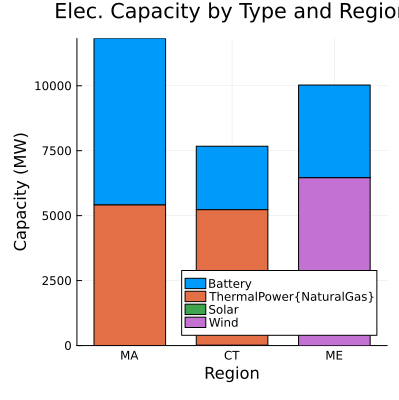

In [ ]:
pct_reduction = 20
df = CSV.read("results/" * string(pct_reduction) * "pct_co2_reduction_capacity.csv", DataFrame)
df_elec = get_processed_df(df, elec_types)
values = get_matrix(df_elec)
groupedbar(
    states,
    values,
    label = permutedims(elec_types),
    bar_position=:stack,
    bar_width=0.7,
    legend = :bottomright,
    size = (400, 400),
    xlabel = "Region",
    ylabel = "Capacity (MW)",
    title = "Elec. Capacity by Type and Region",
)

In [ ]:
using CSV, DataFrames, StatsPlots

# Parameters
pct_reductions = [0, 20, 40, 60, 80]  # Example reductions
n = length(pct_reductions)

# Setup plot layout (e.g., 5 rows, 1 column)
plot_layout = @layout([a{0.99h}; b{0.99h}; c{0.99h}; d{0.99h}; e{0.99h}])

p = plot(layout = plot_layout, size = (500, 200 * n))  # Adjust size as needed

# Iterate over each reduction scenario
for (i, pct) in enumerate(pct_reductions)
    # 1. Read CSV
    filepath = "results/" * string(pct) * "pct_co2_reduction_capacity.csv"
    df = CSV.read(filepath, DataFrame)

    # 2. Process DataFrame
    df_elec = get_processed_df(df, elec_types)  # You already have this function
    values = get_matrix(df_elec)               # Your function

    # 3. Plot in subplot i
    groupedbar!(
        states,
        values,
        label = permutedims(elec_types),
        bar_position = :stack,
        bar_width = 0.7,
        xlabel = "Region",
        ylabel = "Capacity (MW)",
        title = "Elec. Capacity (" * string(pct) * "% CO₂ Reduction)",
        subplot = i,          # <---- Assign subplot index
        legend = (i == n ? :bottomright : false)  # Only show legend in last plot
    )
end

# Display
display(p)

ArgumentError: ArgumentError: "results/0pct_co2_reduction_capacity.csv" is not a valid file or doesn't exist